# 📌 Avaliação do Modelo Preditivo e Interpretação com SHAP

## 1 -  Introdução

Este estudo tem o objetivo de **avaliar a performance do modelo preditivo de evasão acadêmica** em uma nova base de alunos e **explicar, de forma acessível e transparente, os fatores que mais influenciam essas decisões**.

O modelo preditivo utilizado neste experimento foi treinado anteriormente e agora será testado em uma nova base, contendo **alunos cuja situação já está definida**. Além disso, empregamos a técnica **SHAP (SHapley Additive Explanations)** para **interpretar o impacto de cada variável na decisão do modelo**.

### 🔹 Objetivos:
✅ **Avaliar a performance do modelo** na nova base.  
✅ **Gerar métricas de desempenho** como Acurácia, Precisão, Recall e F1-Score.  
✅ **Interpretar as previsões do modelo** utilizando SHAP para identificar quais variáveis mais influenciam a evasão.  
✅ **Fornecer insights para tomada de decisão** em políticas educacionais e estratégias acadêmicas.

### 🔹 Metodologia:
1️⃣ **Carregar o modelo treinado e a nova base de alunos**.  
2️⃣ **Aplicar as mesmas transformações de pré-processamento** (encoders e scaler) na nova base.  
3️⃣ **Fazer previsões e comparar com a situação real dos alunos**.  
4️⃣ **Gerar explicações SHAP para entender como o modelo toma decisões**.  
5️⃣ **Visualizar os fatores mais importantes na predição de evasão**.

---



### 1.1 Bibliotecas Utilizadas

Para realizar a **avaliação do modelo** e a **interpretação dos resultados**, utilizamos diversas bibliotecas do ecossistema Python. Abaixo, detalhamos as principais e suas funções neste projeto:

- **numpy e pandas** → Manipulação e análise de dados.  
- **joblib** → Carregamento do modelo treinado.  
- **matplotlib e seaborn** → Visualização de dados e gráficos.  
- **shap** → Interpretabilidade do modelo via SHAP (SHapley Additive Explanations).  
- **scikit-learn** → Avaliação de métricas preditivas:  
  - `ConfusionMatrixDisplay` → Exibição da Matriz de Confusão.  
  - `roc_auc_score` → Cálculo da métrica ROC AUC.  
  - `classification_report` → Relatório com métricas de Acurácia, Precisão, Recall e F1-Score.  
  - `confusion_matrix` → Construção da Matriz de Confusão.  

Essas bibliotecas permitem **avaliar o desempenho do modelo de forma detalhada** e **interpretar suas decisões** de maneira clara e objetiva.

---


In [1]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import shap
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

### 1.2 Carregamento do Modelo, Scaler e Encoders

Para realizar a avaliação do modelo na nova base de alunos, carregamos os seguintes componentes:

- **Modelo Treinado (`XGBoost`)** → Modelo salvo após o treinamento na base anterior.
- **Scaler (`StandardScaler`)** → Responsável por normalizar as variáveis numéricas para manter a escala dos dados compatível com a utilizada no treinamento.
- **Encoders (`LabelEncoders`)** → Mapeiam as variáveis categóricas para valores numéricos, garantindo a mesma codificação aplicada na base de treino.

Esses arquivos foram salvos anteriormente e agora são carregados para serem aplicados na nova base de alunos.

---


In [2]:
# Carregar o scaler utilizado na normalização das variáveis numéricas
scaler = joblib.load("Model/scaler_numerico_13_02_B.pkl")

# Carregar os encoders usados para transformar variáveis categóricas em numéricas
label_encoders = joblib.load("Model/label_encoders_13_02.pkl")

# Carregar o modelo XGBoost treinado para prever a conclusão/evadir alunos
modelo_XGBoost_prever_conclusao = joblib.load("Model/model_xgboost_prever_conclusao_13_02.pkl")

print("✅ Modelo, scaler e encoders carregados com sucesso!")

✅ Modelo, scaler e encoders carregados com sucesso!


/home/ronald/anaconda3/lib/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ronald/anaconda3/lib/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.3.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## 2 Carregar Base da Dados

### 2.1 Carregamento e Seleção da Nova Base de Alunos

Para avaliar o modelo, utilizamos uma **nova base de alunos** contendo estudantes que ingressaram na universidade entre **2008 e 2010**. O objetivo é testar a capacidade do modelo de generalizar suas previsões para um novo conjunto de dados.

### 🔹 Etapas do Processamento:
1️⃣ **Carregar a base de dados** → Importamos os dados do arquivo `.csv` contendo os alunos.  
2️⃣ **Selecionar os alunos ingressantes entre 2008 e 2010** → Filtramos os registros para manter apenas os alunos desse período.  
3️⃣ **Garantir que apenas alunos com status `DESLIGADO` ou `CONCLUÍDO` sejam considerados** → Para manter a coerência com a classificação do modelo.  


---


In [3]:
# Carregar a base de dados
bd = pd.read_csv('base/Base_limpa_aluno_ano_ingresso_menor_2011.csv', delimiter=',')

# Definir a coluna 'Nome' como índice
bd.set_index('Nome', inplace=True)

# Filtrar alunos ingressantes entre 2008 e 2010
alunos = bd[bd["Ano_Ingresso"] >= 2008]

# Manter apenas alunos que têm o status 'DESLIGADO' ou 'CONCLUÍDO'
alunos = alunos[alunos["Status"].isin(["DESLIGADO", "CONCLUÍDO"])]

# Exibir a quantidade total de registros
print(f"✅ Base carregada com sucesso! Total de registros: {len(alunos)}")


✅ Base carregada com sucesso! Total de registros: 557


### 2.2 Visualização da Distribuição do Status dos Alunos

Para entender a composição da amostra utilizada na avaliação do modelo, analisamos a **distribuição dos alunos entre as categorias `DESLIGADO` e `CONCLUÍDO`** , com o objetivo de identificar a proporção de alunos que **concluíram** versus aqueles que **foram desligados**.

---


In [4]:
# Geração do dataframe
df = alunos['Status'].value_counts().reset_index()
df.columns = ['Status', 'count']

# Dicionário para correspondência das cores
cores_situacao = {
    'CONCLUÍDO': '#065A57',  
    'DESLIGADO': '#5A021F',  
}

# Conversão do dicionário de cores para uma lista, alinhada com os valores únicos de 'Novo_Status'
ordem_status = df['Status'].tolist()
cores_alinhadas = [cores_situacao[status] for status in ordem_status if status in cores_situacao]

# Criação do gráfico com ajuste para cores
grafico = px.bar(
    df,
    x='Status',
    y='count',
    color='Status',
    color_discrete_sequence=cores_alinhadas,  
    title='Distribuição Situação do Aluno'
)
# Atualizar layout do gráfico
grafico.update_layout(
    xaxis_title='Status',
    yaxis_title='Quantidade de Alunos',
    height=500,
    width=800,
    xaxis=dict(tickangle=0))

# Exibir o gráfico
grafico.show()

### 2.3 - Pré-processamento dos Dados: Mantendo as Mesmas Características do Treinamento

Para garantir que o modelo XGBoost opere corretamente na nova base, **utilizamos as mesmas variáveis que foram usadas no treinamento**.

### 🔹 Etapas do Processamento:
1️⃣ **Selecionar apenas as colunas que foram utilizadas na modelagem** → Mantemos as mesmas features.  
2️⃣ **Aplicar Label Encoding** → Transformamos as variáveis categóricas em valores numéricos com os encoders salvos.  
3️⃣ **Aplicar StandardScaler** → Normalizamos as variáveis numéricas da mesma forma que no treinamento.  

Esse procedimento **garante que a nova base esteja no mesmo formato da base original**, evitando problemas na inferência do modelo.

---

In [4]:
# exclui apenas as colunas que não foram usadas no treinamento
var_excluir = ['Data_Nascimento','Cidade_Estado','CEP','Ano_Ingresso','Periodo_Ingresso','Forma_Ingresso','Ano_Periodo_Saida','Tipo_Saida',
               'Prazo_Integralizacao','Prazo_Integralizacao_Ano', 'Prazo_Integralizacao_Semestre','Ano_Saida','Semestre_Saida',
               'Tempo_permanencia_Meses','Data_Ingresso','Idade_Ingresso','Curso']

df_modelagem = alunos.drop(columns=var_excluir)

 # 1.2. Codificação das variáveis categóricas
variaveis_categoricas = ['Tipo_Raca', 'Tipo_Rede_Ensino', 'Faixa_Etaria','Sexo','Região_Origem']
for col in variaveis_categoricas:
    if col in label_encoders:
        df_modelagem[col] = label_encoders[col].transform(df_modelagem[col])

numeric_features = df_modelagem.select_dtypes(include=['float64']).columns
df_modelagem[numeric_features] = scaler.transform(df_modelagem[numeric_features])

# Exibir a estrutura final dos dados antes da previsão
print("✅ Estrutura final dos dados para modelagem:")
#df_modelagem.head()


✅ Estrutura final dos dados para modelagem:


### 2.4 - Separação das Variáveis Explicativas (X) e da Variável-Alvo (y)

Antes de fazermos previsões com o modelo treinado, precisamos **separar as variáveis que serão usadas na modelagem (`X`) da variável que queremos prever (`y`)**.

#### 🔹 Estratégia:
- **`X` (Variáveis Explicativas)** → Contém todas as características usadas para fazer a previsão.
- **`y` (Variável-Alvo)** → Representa a situação do aluno (`CONCLUÍDO` ou `DESLIGADO`).

#### 🔹 Mapeamento da Variável-Alvo:
Para manter a coerência com o modelo treinado, mapeamos a variável `Status` da seguinte forma:
- **`CONCLUÍDO` → 1** (Aluno que concluiu o curso).
- **`DESLIGADO` → 0** (Aluno que evadiu).

---


In [6]:
# Separar as variáveis explicativas (X) e a variável-alvo (y)
X = df_modelagem.drop(columns=["Status"])
y = df_modelagem["Status"].map({"CONCLUÍDO": 1, "DESLIGADO": 0})

# Exibir as primeiras linhas para verificação
print("✅ Estrutura de X (variáveis explicativas):")
#display(X.head())

print("\n✅ Distribuição da variável-alvo y:")



✅ Estrutura de X (variáveis explicativas):

✅ Distribuição da variável-alvo y:


## 3 - Teste do Modelo XGBoost na Nova Base

Agora que os dados estão preparados, aplicamos o **modelo treinado** para prever a conclusão dos alunos e avaliamos sua performance.

### 🔹 Estratégia:
1️⃣ **Fazer previsões (`predict`)** na base de alunos utilizando o modelo XGBoost.  
2️⃣ **Calcular as métricas de avaliação**:
   - `Precisão`: Quantos dos alunos previstos como evadidos realmente evadiram?
   - `Recall`: Quantos alunos evadidos o modelo conseguiu identificar corretamente?
   - `F1-Score`: Média harmônica entre Precisão e Recall.  
3️⃣ **Gerar a Matriz de Confusão** para visualizar erros e acertos.  
4️⃣ **Calcular a AUC (Área Sob a Curva ROC)** → Mede a capacidade do modelo em distinguir entre classes.  

---


📊 Relatório de Classificação com Threshold Ajustado (0.8):
              precision    recall  f1-score   support

   DESLIGADO     0.8745    0.8681    0.8713       273
   CONCLUÍDO     0.8741    0.8803    0.8772       284

    accuracy                         0.8743       557
   macro avg     0.8743    0.8742    0.8743       557
weighted avg     0.8743    0.8743    0.8743       557

🔹 AUC: 0.9410


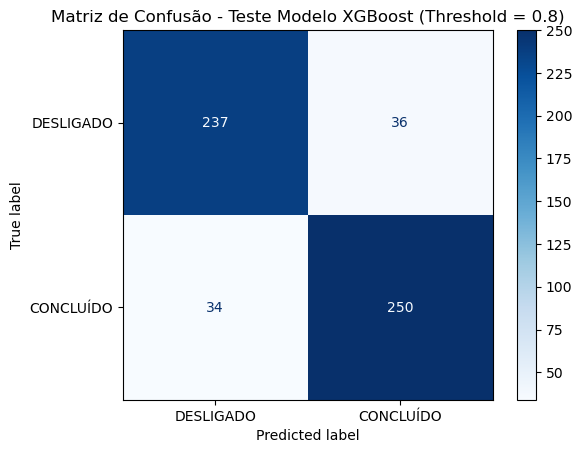

In [10]:

# Definindo o threshold ajustado (foco em alta precisão para CONCLUÍDO)
threshold = 0.8

# Obter probabilidades preditas para a classe CONCLUÍDO (classe 1)
probabilidades = modelo_XGBoost_prever_conclusao.predict_proba(X)[:, 1]

# Aplicar o threshold ajustado para gerar previsões binárias
previsoes = (probabilidades >= threshold).astype(int)

# Imprimir relatório de classificação
print("📊 Relatório de Classificação com Threshold Ajustado ({}):".format(threshold))
print(classification_report(y, previsoes, digits=4, target_names=["DESLIGADO", "CONCLUÍDO"]))

# Calcular AUC (área sob a curva ROC) — independe do threshold
print("🔹 AUC: {:.4f}".format(roc_auc_score(y, probabilidades)))

# Gerar Matriz de Confusão
matriz_confusao = confusion_matrix(y, previsoes, labels=[0, 1])  # 0 = desligado, 1 = concluído
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=["DESLIGADO", "CONCLUÍDO"])
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Matriz de Confusão - Teste Modelo XGBoost (Threshold = {threshold})")
plt.grid(False)
plt.show()


### 3.1 Avaliação Final do Modelo: Taxa de Acerto e Erro

Após realizar o teste do modelo na nova base e ajustar o threshold, avaliamos sua **taxa de acerto e erro** com base na **Matriz de Confusão**.

### 🔹 Estratégia:
1️⃣ **Utilizamos os valores da matriz de confusão** para calcular o desempenho do modelo.  
2️⃣ **Calculamos a taxa de acerto** → Percentual de previsões corretas (`VP + VN`).  
3️⃣ **Calculamos a taxa de erro** → Percentual de previsões incorretas (`FP + FN`).  
4️⃣ **Geramos um gráfico de pizza** para representar visualmente essas taxas.  

### 🔹 Interpretação:
- **Uma alta taxa de acerto indica que o modelo está conseguindo prever corretamente a evasão/conclusão dos alunos**.  
- **A taxa de erro mostra os casos em que o modelo não conseguiu classificar corretamente os alunos**.  

---


Text(0.5, 1.0, 'Taxa de Acerto vs. Taxa de Erro do Modelo XGBoost')

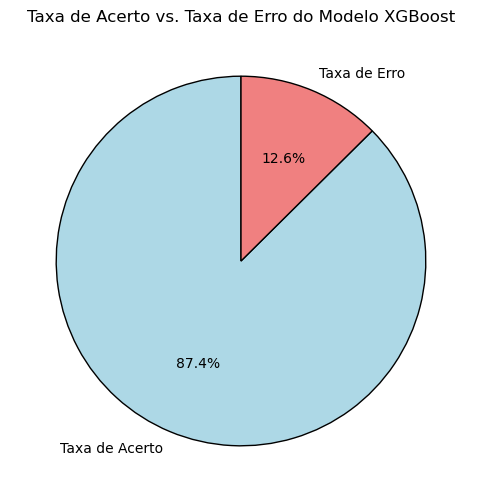

In [12]:
# Dados da matriz de confusão (threshold = 0.8)
verdadeiros_negativos = 237  # DESLIGADO previsto corretamente
falsos_positivos = 36        # DESLIGADO previsto como CONCLUÍDO
falsos_negativos = 34        # CONCLUÍDO previsto como DESLIGADO
verdadeiros_positivos = 250  # CONCLUÍDO previsto corretamente

# Total de previsões realizadas
total_previsoes = verdadeiros_positivos + falsos_negativos + verdadeiros_negativos + falsos_positivos

# Cálculo das taxas de acerto e erro
taxa_acerto = (verdadeiros_positivos + verdadeiros_negativos) / total_previsoes * 100
taxa_erro = (falsos_positivos + falsos_negativos) / total_previsoes * 100

# Criando o gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    [taxa_acerto, taxa_erro],
    labels=["Taxa de Acerto", "Taxa de Erro"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightblue", "lightcoral"],
    wedgeprops={"edgecolor": "black"},
)
ax.set_title("Taxa de Acerto vs. Taxa de Erro do Modelo XGBoost")

# Exibir o grá

 ## 4 - Interpretabilidade do Modelo com SHAP


Para compreender **como o modelo XGBoost toma decisões**, utilizamos a **técnica SHAP (SHapley Additive Explanations)**, que permite **interpretar a importância e o impacto das variáveis no modelo**.

### 🔹 Benefícios do SHAP:
✅ Explica **como cada variável contribui para a previsão** do modelo.  
✅ Ajuda a **entender os padrões associados à evasão ou conclusão**.  
✅ Permite uma análise **global (importância geral das variáveis)** e **local (influência sobre um aluno específico)**.  

### 4.1 🔹 Previsão Global
A **importância global** das variáveis mostra quais características dos alunos mais influenciam a previsão do modelo.

O gráfico SHAP abaixo apresenta:
- **Variáveis mais influentes** → Quanto maior a dispersão no eixo X, maior a importância da variável.  
- **Impacto positivo ou negativo** → A cor indica se o valor da variável aumenta ou diminui a chance de evasão/conclusão.

---

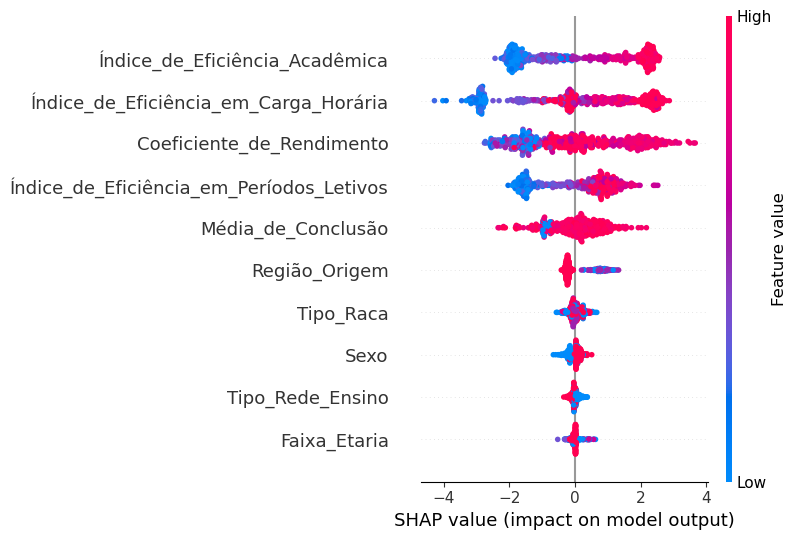

In [39]:
# Criar explicador SHAP para o modelo XGBoost
explainer_xgb = shap.Explainer(modelo_XGBoost_prever_conclusao, X)

# Obter os valores SHAP para todas as previsões
shap_values_xgb = explainer_xgb(X)

# Gerar o gráfico de importância global das variáveis
shap.summary_plot(shap_values_xgb, X)

O gráfico SHAP acima representa **a influência das variáveis na decisão do modelo**.

### 🔹 Como interpretar o gráfico:
- **Cada ponto representa um aluno na base** e mostra o impacto do valor de uma variável na previsão final.
- **O eixo Y** lista as variáveis do modelo em ordem de importância (da mais para a menos relevante).
- **O eixo X** indica o impacto que a variável teve na previsão:
  - Valores **positivos (+)** aumentam a chance de **conclusão** (classe 1).
  - Valores **negativos (-)** aumentam a chance de **evasão** (classe 0).
- **As cores** representam os valores das variáveis:
  - 🔴 **Vermelho** → Alto valor da variável.
  - 🔵 **Azul** → Baixo valor da variável.

### 🔹 Principais insights do modelo:
1️⃣ **O `Índice de Eficiência Acadêmica` é a variável mais influente.**  
   🔹 Se o índice for alto (vermelho), o aluno tem maior probabilidade de **concluir** o curso.  
   🔹 Se for baixo (azul), aumenta a chance de **evasão**.  

2️⃣ **O `Coeficiente de Rendimento` e `Índice de Eficiência em Carga Horária` também têm forte impacto.**  
   🔹 Alunos com **baixo coeficiente e eficiência** têm maior risco de evasão.  

3️⃣ **Variáveis como `Região de Origem`, `Tipo de Escola` e `Faixa Etária` têm impacto menor.**  
   🔹 Embora influenciem, elas não são os principais fatores na decisão do modelo.  

### 🔹 Conclusão:
- O modelo identifica **indicadores acadêmicos como os principais fatores para prever a evasão/conclusão dos alunos**.  
- **Alunos com alto desempenho acadêmico têm maior probabilidade de concluir o curso**, enquanto aqueles com **baixo desempenho** estão mais propensos à evasão.  
- **Esse tipo de análise pode apoiar estratégias de intervenção**, permitindo que gestores acadêmicos **ajam precocemente** em alunos em risco.  

---


### 4.2 Análise Complementar: Importância Média das Variáveis

O gráfico anterior mostrou **como cada variável impacta as previsões do modelo** de forma individual para cada aluno. Agora, utilizamos uma **métrica complementar** que exibe a **importância média das variáveis** no modelo.

#### 🔹 Como interpretar esse gráfico:
- **Eixo Y** → Lista das variáveis do modelo (da mais para a menos importante).  
- **Eixo X** → Média dos valores absolutos dos impactos SHAP das variáveis.  
- **Quanto maior o valor SHAP médio**, mais essa variável influencia as decisões do modelo.  

#### 🔹 Principais insights:
1️⃣ **`Índice de Eficiência Acadêmica` e `Índice de Eficiência em Carga Horária` são os fatores mais determinantes.**  
2️⃣ **Variáveis como `Região de Origem`, `Tipo de Escola` e `Faixa Etária` têm impacto menor.**  
3️⃣ **Indicadores acadêmicos dominam a tomada de decisão do modelo, sugerindo que o desempenho acadêmico é o maior preditor de evasão/conclusão.**  

Esse gráfico reforça que **o modelo prioriza informações relacionadas ao desempenho acadêmico**, o que pode guiar **estratégias de intervenção** para evitar evasão.

---


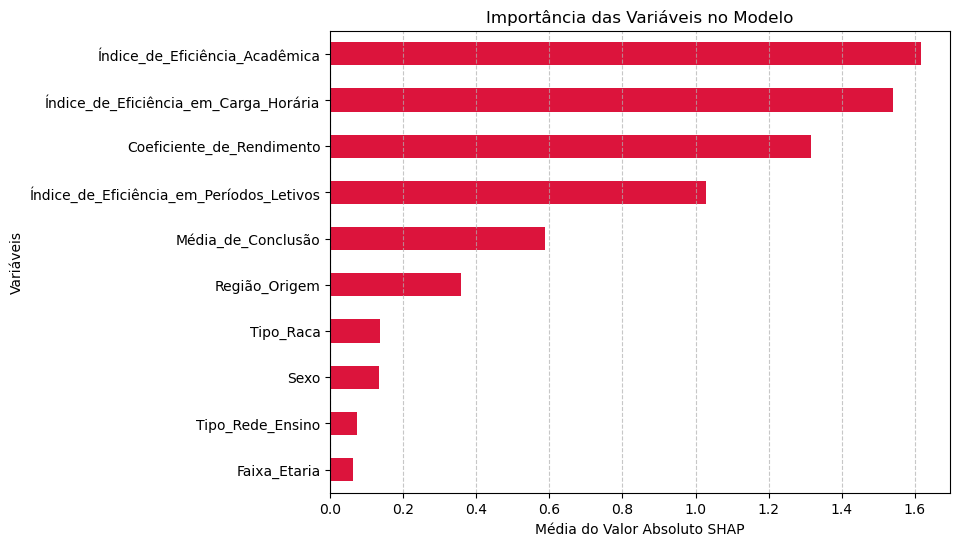

In [40]:
# Extrair os valores SHAP médios em formato de DataFrame
shap_values_abs_mean = pd.DataFrame(
    data=shap_values_xgb.values, columns=X.columns  # X são os dados de entrada do modelo
).abs().mean().sort_values(ascending=True)  # Calcula a média dos valores absolutos e ordena

# Criar o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
shap_values_abs_mean.plot(kind="barh", color="crimson")  # Plota as barras na horizontal
plt.xlabel("Média do Valor Absoluto SHAP")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Modelo")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



### 4.3 Análise de Dependência entre Variáveis e Evasão

Os gráficos de dependência SHAP permitem **entender a relação entre uma variável específica e a previsão do modelo**. Além disso, podemos adicionar **uma segunda variável para visualizar interações**.

Nesta análise, utilizamos a **Análise de Dependência SHAP** para entender **como o Coeficiente de Rendimento impacta a previsão do modelo e como ele interage com o Índice de Eficiência**.


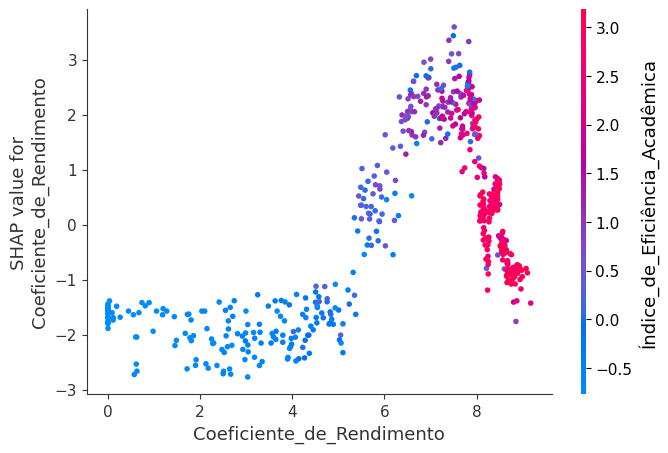

In [55]:
import shap
import matplotlib.pyplot as plt

# Criar um DataFrame separado para o gráfico
X_para_grafico = X.copy()

# Aplicar a transformação inversa para TODAS as variáveis normalizadas
X_real = pd.DataFrame(scaler.inverse_transform(X[numeric_features]), columns=numeric_features, index=X.index)

# Garantir que os índices batem e substituir os valores corretamente
if "Coeficiente_de_Rendimento" in X_real.columns:
    X_para_grafico["Coeficiente_de_Rendimento"] = X_real["Coeficiente_de_Rendimento"]
else:
    print("Erro: Coluna 'Coeficiente_de_Rendimento' não encontrada após transformação inversa.")


# Gerar o gráfico SHAP com os valores reais do CR no eixo X
shap.dependence_plot(
    "Coeficiente_de_Rendimento",
    shap_values_xgb.values,
    X_para_grafico,
    interaction_index="Índice_de_Eficiência_Acadêmica"
)


### 🔹 Como interpretar esse gráfico:
**Eixo X (horizontal) → Coeficiente de Rendimento (CR)**  
   - Representa o desempenho acadêmico do aluno com base na média de suas notas.  
   - Quanto maior o CR, melhor o desempenho do aluno.  
   - Valores **próximos de zero indicam baixo rendimento**, enquanto valores **próximos de 8-10 indicam alto rendimento**.

**Eixo Y (vertical) → Valor SHAP**  
   - Representa o impacto do CR na previsão do modelo.  
   - Valores **positivos (+)** indicam que o CR **aumenta a chance de conclusão**.  
   - Valores **negativos (-)** indicam que o CR **aumenta a chance de evasão**.  

**Cores → Índice de Eficiência Acadêmica**  
   - 🔵 **Azul** → Índice de Eficiência Acadêmica baixo.  
   - 🔴 **Vermelho** → Índice de Eficiência Acadêmica alto.  


### 🔹 O que esse gráfico revela sobre evasão/conclusão
**1. Alunos com CR muito baixo (< 6.0) estão altamente propensos à evasão**  
   - A maioria dos pontos **nessa faixa do gráfico está abaixo de zero no eixo Y**, indicando que o modelo prevê **uma maior probabilidade de evasão** para alunos com baixo rendimento.  
   - A cor **predominante é azul**, sugerindo que esses alunos também possuem **baixa eficiência acadêmica**, o que reforça o risco de evasão.

**2. O impacto do CR não é linear**  
   - Para alunos com CR **entre 4 e 6**, os impactos variam bastante.  
   - Isso sugere que **outros fatores além do CR podem influenciar a decisão do modelo**, como eficiência acadêmica, tempo de permanência ou região de origem.

**3. Alunos com CR alto (> 6.5) têm maior chance de conclusão, mas nem sempre**  
   - A maioria dos pontos acima de 6.5 está **acima de zero no eixo Y**, indicando que o modelo prevê uma **alta probabilidade de conclusão**.  
   - No entanto, **há alguns pontos azuis com valores negativos** nessa região, indicando que **alguns alunos com CR alto ainda podem estar em risco de evasão**. Isso pode ser explicado por **baixa eficiência acadêmica** ou outras dificuldades não refletidas diretamente no CR.

**4. A interação entre CR e Índice de Eficiência Acadêmica é essencial**  
   - Alunos **com CR alto e Índice de Eficiência Acadêmica alto (vermelhos) têm forte impacto positivo na previsão de conclusão**.  
   - Porém, mesmo alunos com CR alto podem ter impacto negativo se sua eficiência acadêmica for baixa (azul), indicando **um risco oculto de evasão**.  


### 🔹 Como esse insight pode ser aplicado na prática?
✅ **Monitoramento acadêmico** → Alunos com **baixo CR (< 4.0) e baixa eficiência acadêmica** são **altamente vulneráveis à evasão**. Esses alunos devem ser **prioridade para programas de apoio**.  

✅ **Apoio direcionado** → Alunos com **CR intermediário (entre 4 e 6) precisam de acompanhamento específico**, pois seu risco de evasão varia de acordo com outros fatores acadêmicos.  

✅ **Análise de riscos ocultos** → Alunos com **CR alto (> 6.5) mas eficiência acadêmica baixa ainda podem estar em risco de evasão**. Isso indica que apenas um **bom desempenho em notas não é suficiente para garantir a conclusão do curso**.  


### **Conclusão**
- O modelo **identifica que o desempenho acadêmico é um fator-chave na evasão**, mas a relação **não é linear**.  
- **A eficiência acadêmica modera o impacto do CR**, e alunos com **eficiência baixa** ainda podem estar em risco de evasão mesmo com boas notas.  
- **Gestores acadêmicos podem usar essa informação para criar estratégias de intervenção personalizadas**, focando não apenas em notas, mas também no **aproveitamento acadêmico e carga horária** dos alunos.  

---


### 4.3.1 - Análise de Dependência: Relação entre Variáveis e Evasão

Nesta análise, utilizamos a **Análise de Dependência SHAP** para entender **como o Índice de Eficiência Acadêmica impacta a previsão do modelo e como ele interage com o Índice de Eficiência em Carga Horária**.

### Objetivo:
✅ **Identificar a influência do Índice de Eficiência Acadêmica na evasão/conclusão**.  
✅ **Entender como essa variável interage com a eficiência em carga horária** e se essa relação modifica o impacto na previsão do modelo.  
✅ **Detectar padrões que podem ser úteis para intervenções acadêmicas** e estratégias de acompanhamento.  

O gráfico a seguir mostra:
- Como **o Índice de Eficiência Acadêmica impacta diretamente a previsão do modelo**.
- A relação com a **eficiência em carga horária** como uma variável de interação (representada pelas cores).  

---


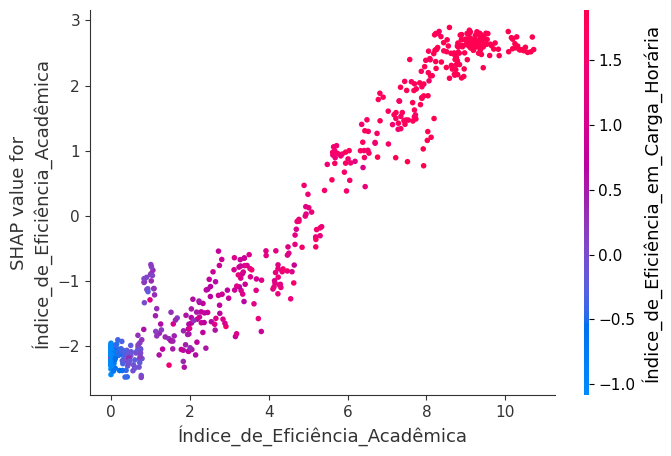

In [56]:
# Criar um DataFrame separado para o gráfico
X_para_grafico = X.copy()
# Aplicar a transformação inversa para TODAS as variáveis normalizadas
X_real = pd.DataFrame(scaler.inverse_transform(X[numeric_features]), columns=numeric_features, index=X.index)
# Garantir que os índices batem e substituir os valores corretamente
if "Índice_de_Eficiência_Acadêmica" in X_real.columns:
    X_para_grafico["Índice_de_Eficiência_Acadêmica"] = X_real["Índice_de_Eficiência_Acadêmica"]
else:
    print("Erro: Coluna 'Índice_de_Eficiência_Acadêmicao' não encontrada após transformação inversa.")

# Gerar o gráfico SHAP com os valores reais do CR no eixo X
shap.dependence_plot(
    "Índice_de_Eficiência_Acadêmica",
    shap_values_xgb.values,
    X_para_grafico,
    interaction_index="Índice_de_Eficiência_em_Carga_Horária"
)

### **Como interpretar esse gráfico**
**Eixo X (horizontal) → Índice de Eficiência Acadêmica**  
   - Mede a eficiência do aluno em completar disciplinas dentro do tempo ideal.  
   - **Valores baixos (próximos de 0)** indicam que o aluno tem dificuldades acadêmicas.  
   - **Valores altos (> 6)** indicam um bom desempenho acadêmico.

**Eixo Y (vertical) → Valor SHAP**  
   - Representa **o impacto do Índice de Eficiência Acadêmica na previsão do modelo**.  
   - **Valores positivos (+)** indicam que o Índice de Eficiência Acadêmica **aumenta a chance de conclusão**.  
   - **Valores negativos (-)** indicam que o Índice de Eficiência Acadêmica **aumenta a chance de evasão**.  

**Cores → Índice de Eficiência em Carga Horária**  
   - 🔵 **Azul** → Baixa eficiência em carga horária.  
   - 🔴 **Vermelho** → Alta eficiência em carga horária.  


### **O que esse gráfico revela sobre evasão/conclusão**
 **1. Índices de Eficiência Acadêmica muito baixos estão associados a uma maior probabilidade de evasão.**  
   - Alunos com **baixo índice de eficiência acadêmica (próximos de 0 no eixo X)** têm **valores SHAP negativos**, indicando que o modelo prevê **maior risco de evasão** para esses alunos.  
   - A cor **predominante é azul**, sugerindo que muitos desses alunos também possuem **baixa eficiência em carga horária**, reforçando o risco de evasão.  

 **2. O impacto do Índice de Eficiência Acadêmica é linear e positivo.**  
   - À medida que **o Índice de Eficiência Acadêmica aumenta**, o impacto na previsão se torna **mais positivo**, sugerindo **uma maior chance de conclusão**.  

 **3. A eficiência em carga horária modula esse efeito.**  
   - 🔴 **Alunos com alto Índice de Eficiência Acadêmica e alta eficiência em carga horária (vermelhos) têm forte impacto positivo na previsão de conclusão.**  
   - 🔵 **Mesmo alunos com Índice de Eficiência Acadêmica razoável ainda podem ter risco de evasão se a eficiência em carga horária for baixa (azul)**.  

### **Como esse insight pode ser aplicado na prática?**
✅ **Monitoramento acadêmico** → Alunos com **baixo Índice de Eficiência Acadêmica e baixa eficiência em carga horária** são altamente vulneráveis à evasão e devem ser priorizados para programas de apoio.  

✅ **Apoio direcionado** → Alunos com **eficiência acadêmica intermediária precisam de acompanhamento**, pois seu risco de evasão varia com a eficiência em carga horária.  

✅ **Prevenção da evasão** → Estratégias para melhorar a **eficiência em carga horária** podem ajudar alunos que possuem **bom Índice de Eficiência Acadêmica, mas ainda apresentam risco de evasão**.  

### **Conclusão**
- O modelo **identifica que o Índice de Eficiência Acadêmica é um dos principais preditores de evasão/conclusão**.  
- **Alunos com baixa eficiência acadêmica e baixa carga horária apresentam o maior risco de evasão**.  
- **Apenas ter um Índice de Eficiência Acadêmica alto não é suficiente para garantir a conclusão, se a carga horária não for bem administrada**.  
- **Gestores acadêmicos podem usar essas informações para desenvolver estratégias de intervenção personalizadas**, garantindo que os alunos tenham não apenas bom desempenho, mas também um planejamento de carga horária adequado para evitar evasão.  

---


### 5 - Explicação Local das Previsões (Aluno Específico)

Agora avaliamos a **previsão feita para um aluno específico**. Essa análise permite **entender quais fatores contribuíram para a decisão do modelo** e identificar **quais características tiveram maior peso na previsão individual desse aluno**.


### Objetivo:
✅ **Verificar se o modelo acertou ou errou a previsão da situação do aluno**.  
✅ **Identificar quais variáveis foram mais relevantes na decisão para esse aluno específico**.  
✅ **Comprovar a transparência do modelo, garantindo que as previsões sejam interpretáveis e justificáveis**.  

O gráfico a seguir mostra:
- Quais variáveis **aumentaram a chance de conclusão** (barras vermelhas).  
- Quais variáveis **aumentaram a chance de evasão** (barras azuis).  
- A **contribuição individual de cada variável** na previsão final do modelo.  

---


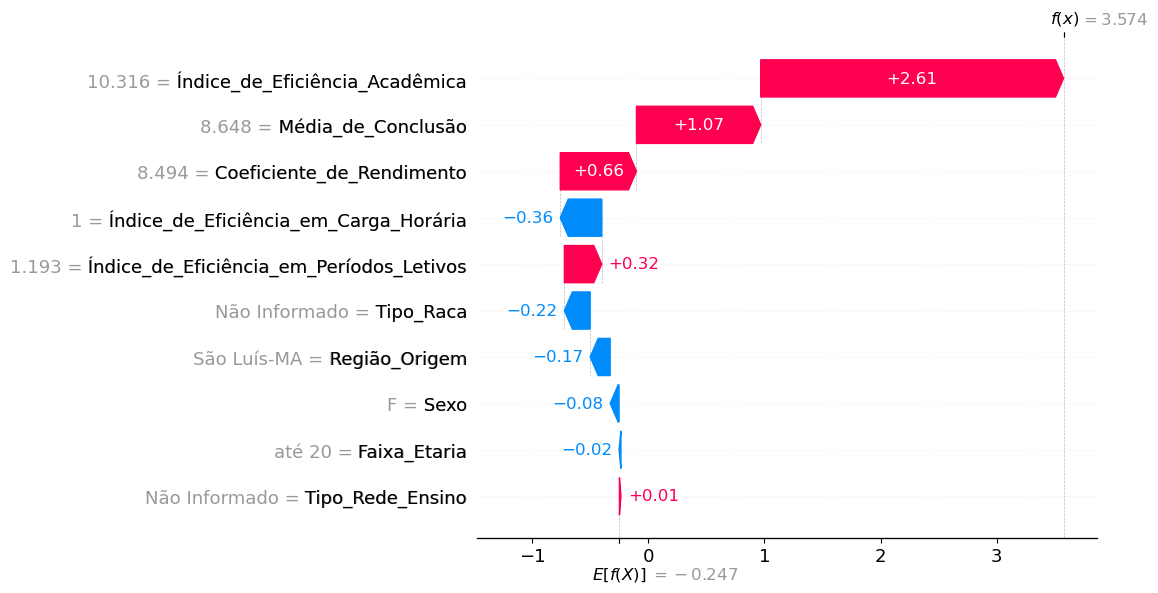

In [62]:
# Índice do aluno na base X
idx = 2
shap_aluno = shap_values_xgb[idx]

# Garantindo que dados_aluno contenha as features corretamente
dados_aluno = alunos.iloc[idx]  # Pega os dados do aluno na base X

# Criando a explicação SHAP
shap_exp = shap.Explanation(
    values=shap_aluno.values, 
    base_values=shap_aluno.base_values, 
    data=pd.Series(dados_aluno, index=X.columns),  # Aqui usamos X.columns diretamente
    feature_names=X.columns  # Definindo as colunas corretamente
)
# Gerando o gráfico Waterfall
shap.plots.waterfall(shap_exp)


#### **Como interpretar esse gráfico**
**O eixo horizontal representa o impacto na previsão do modelo (`f(x)`).**  
   - Valores **positivos (+)** indicam que a variável aumentou a chance de **conclusão**.  
   - Valores **negativos (-)** indicam que a variável aumentou a chance de **evasão**.  
   - A soma dos impactos gera a **previsão final do modelo para o aluno**.

**As barras vermelhas aumentam a chance de conclusão.**  
   - **Quanto maior a barra vermelha, maior a influência positiva**.  
   - Exemplo: `Índice de Eficiência Acadêmica` (+2.61) teve a **maior contribuição para a conclusão**.

**As barras azuis aumentam a chance de evasão.**  
   - **Quanto maior a barra azul, maior a influência negativa**.  
   - Exemplo: `Índice de Eficiência em Carga Horária` (-0.36) indicou **um leve aumento no risco de evasão**.


#### **O que esse gráfico revela sobre a decisão do modelo**
**1. O aluno foi corretamente previsto como "CONCLUÍDO".**  
   - O modelo previu corretamente que esse aluno concluiria o curso, e o gráfico mostra **quais fatores justificam essa previsão**.

**2. O principal fator de conclusão foi o `Índice de Eficiência Acadêmica` (+2.61).**  
   - O alto valor dessa variável teve um **forte impacto positivo**, aumentando a chance de conclusão.  

**3. O `Coeficiente de Rendimento` (+0.66) e a `Média de Conclusão` (+1.07) também reforçaram a previsão de conclusão.**  
   - Alunos com boas notas têm maior probabilidade de concluir o curso.

**4. Algumas variáveis indicaram um pequeno risco de evasão.**  
   - O `Índice de Eficiência em Carga Horária` (-0.36) e `Índice de Eficiência em Períodos Letivos` (-0.32) mostraram um pequeno impacto negativo.  
   - Isso pode indicar que o aluno teve dificuldades com a carga horária, mas conseguiu superar o risco e concluir o curso.


#### **Como esse insight pode ser aplicado na prática**
✅ **Tomada de decisão transparente** → Permite que gestores acadêmicos entendam por que um aluno foi classificado como "Concluído" ou "Evadido".  

✅ **Personalização de intervenções** → Se o modelo indicar risco de evasão, ações preventivas podem ser aplicadas com base nas variáveis mais influentes.  

✅ **Melhoria contínua do modelo** → Se houver inconsistências na previsão, podemos refiná-lo para melhor interpretação e performance.  


### **Conclusão**
- O modelo previu corretamente a **conclusão desse aluno**.  
- **Os principais fatores para essa previsão foram indicadores acadêmicos fortes** (`Índice de Eficiência Acadêmica`, `Coeficiente de Rendimento`, `Média de Conclusão`).  
- **Houve um pequeno risco indicado por carga horária**, mas o desempenho geral do aluno compensou esse fator.  
- **A transparência desse modelo pode auxiliar educadores a identificar padrões e agir preventivamente para reduzir a evasão.**  

---


### 5.1 - Explicação Local das Previsões (Aluno Específico)

Após analisarmos um aluno previsto como **concluído**, agora verificamos um caso onde o modelo previu corretamente que o aluno **evadiu**.  
Essa análise nos ajuda a **entender quais fatores foram mais determinantes para a previsão de evasão**.

---


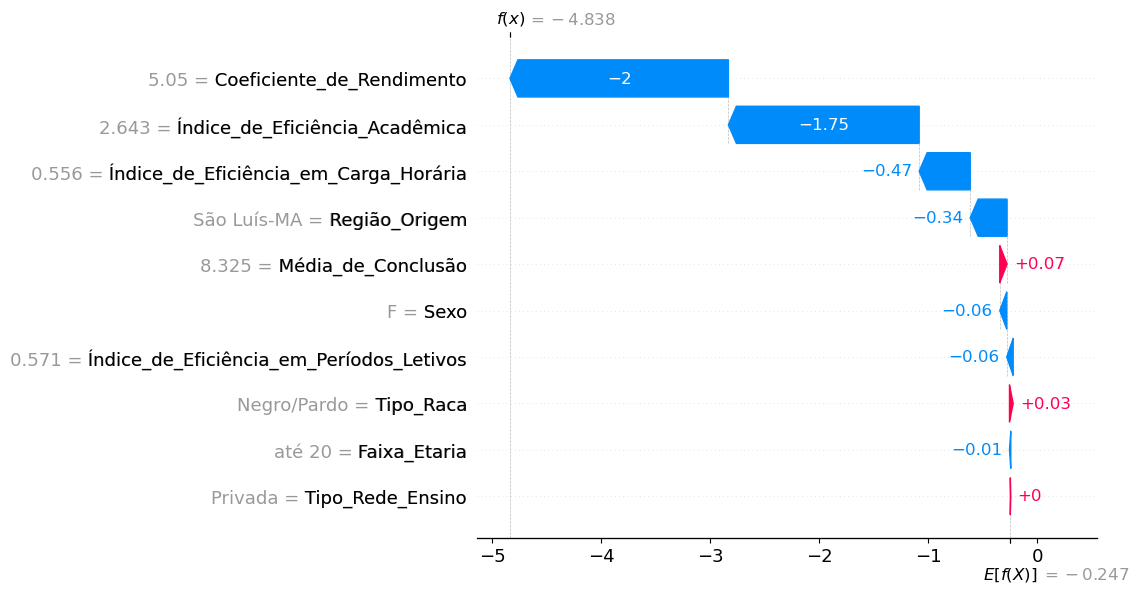

In [64]:
# Índice do aluno na base X
idx = 39
shap_aluno = shap_values_xgb[idx]

# Garantindo que dados_aluno contenha as features corretamente
dados_aluno = alunos.iloc[idx]  # Pega os dados do aluno na base X

# Criando a explicação SHAP
shap_exp = shap.Explanation(
    values=shap_aluno.values, 
    base_values=shap_aluno.base_values, 
    data=pd.Series(dados_aluno, index=X.columns),  # Aqui usamos X.columns diretamente
    feature_names=X.columns  # Definindo as colunas corretamente
)
# Gerando o gráfico Waterfall
shap.plots.waterfall(shap_exp)

#### **🔹 Como interpretar esse gráfico**
**O eixo horizontal representa o impacto na previsão do modelo (`f(x)`).**  
   - Valores **negativos (-)** indicam que a variável **aumentou a chance de evasão**.  
   - Valores **positivos (+)** indicam que a variável **aumentou a chance de conclusão**.  
   - A soma dos impactos gera a **previsão final do modelo para o aluno**.

**As barras azuis aumentam a chance de evasão.**  
   - **Quanto maior a barra azul, maior a influência negativa na previsão**.  
   - Exemplo: `Coeficiente de Rendimento` (-2.00) e `Índice de Eficiência Acadêmica` (-1.75) foram os fatores **mais determinantes para a evasão**.

**As barras vermelhas aumentam a chance de conclusão.**  
   - **Quanto maior a barra vermelha, maior a influência positiva na previsão**.  
   - Exemplo: `Média de Conclusão` (+0.07) teve um impacto **mínimo**, ou seja, **não foi suficiente para impedir a evasão**.

#### **O que esse gráfico revela sobre a decisão do modelo**

**1. O aluno foi corretamente previsto como "EVADIDO".**  
   - O modelo previu corretamente que esse aluno evadiria, e o gráfico mostra **quais fatores justificam essa previsão**.

**2. O principal fator de evasão foi o `Coeficiente de Rendimento` (-2.00).**  
   - O desempenho acadêmico desse aluno foi **baixo**, impactando fortemente a previsão de evasão.  

**3. O `Índice de Eficiência Acadêmica` (-1.75) também contribuiu para a evasão.**  
   - Isso indica que **o aluno teve dificuldades em manter um desempenho acadêmico consistente** ao longo do curso.  

**4. O `Índice de Eficiência em Carga Horária` (-0.47) reforçou a previsão de evasão.**  
   - O aluno pode ter tido problemas em **cursar disciplinas na velocidade ideal**, o que pode ter levado ao acúmulo de matérias e à desmotivação.  

**5. Algumas variáveis indicaram um pequeno fator de permanência, mas não foram suficientes.**  
   - A `Média de Conclusão` (+0.07) teve um leve impacto positivo, mas **não foi suficiente para reverter a previsão de evasão**.  


#### **Como esse insight pode ser aplicado na prática**
✅ **Monitoramento acadêmico** → Alunos com **baixo Coeficiente de Rendimento e baixa eficiência acadêmica** devem ser priorizados para programas de acompanhamento.  

✅ **Apoio personalizado** → Estratégias que auxiliem alunos com **baixo desempenho e dificuldades na carga horária** podem reduzir o risco de evasão.  

✅ **Prevenção ativa** → Caso um aluno apresente características semelhantes, intervenções preventivas podem ser realizadas para evitar a evasão antes que ocorra.  


#### **📌 Conclusão**
- O modelo previu corretamente a **evasão desse aluno**.  
- **Os principais fatores para essa previsão foram desempenho acadêmico fraco (`Coeficiente de Rendimento` e `Índice de Eficiência Acadêmica`) e dificuldades na carga horária**.  
- **As poucas variáveis que indicavam conclusão não foram suficientes para reverter a previsão de evasão**.  
- **Essa análise pode ajudar instituições de ensino a identificar alunos em risco de evasão e intervir precocemente**.  

---